In [16]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [17]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    result: int

In [18]:
def add_numbers(state: AgentState) -> AgentState:
    """This function adds two numbers."""
    state['result'] = state['number1'] + state['number2']
    return state

def subtract_numbers(state: AgentState) -> AgentState:
    """This function subtracts two numbers."""
    state['result'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    """Decides the next operation based on the 'operation' field."""
    if state['operation'] == '+':
        return 'add'
    elif state['operation'] == '-':
        return 'subtract'
    else:
        raise ValueError("Invalid operation. Choose '+' or '-'.")

In [19]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add_numbers)
graph.add_node("subtract_node", subtract_numbers)
graph.add_node("router", lambda state:state) # passthrough function

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        'add': "add_node",
        'subtract': "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

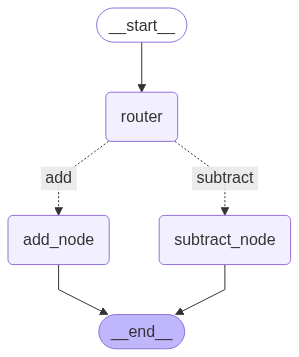

In [20]:
app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
initial_state_1 = AgentState(number1 = 10, operation = "+", number2 = 5)
app.invoke(initial_state_1)

{'number1': 10, 'number2': 5, 'operation': '+', 'result': 15}